## Usvyatsov Mikhail

# Problem 1 (Fast Fourier transform)

## 25 pts

* Implement matrix version of the Cooley-Tukey FFT algorithm (see lecture 4). This means that your goal is to write a function that has vector  as an input and its discrete Fourier transform as an output. Make sure that your algorithm <font color=red>does not utilize full matrices </font> and your complexity is $\mathcal{O}(n \log n)$. For simplicity consider that $n$ is a power of $2$

* Compare timings of your algorithm with those of `np.dot` and `np.fft.fft` by plotting timings as a function of $n$.  Was it a good idea to implement your own version of the FFT? :)

* The overall complexity of FFT algorithm is $\mathcal{O}(n \log n)$. Find analytically constant hidden in $\mathcal{O}(\cdot)$ for the Cooley-Tukey version.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def slow_fft(x):
    N = x.shape[0]

    i, j = np.meshgrid(np.arange(N), np.arange(N))
    M = np.exp(-2j * np.pi * i * j / N)

    return M.dot(x)

def fft(x):
    N = x.shape[0]
    
    if N <= 32:
        return slow_fft(x)
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd, X_even + factor[int(N / 2):] * X_odd])

The slowest run took 6.32 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 35.2 µs per loop
The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.88 µs per loop
10000 loops, best of 3: 48 µs per loop
The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.16 µs per loop
10000 loops, best of 3: 56.4 µs per loop
The slowest run took 4.94 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 7.39 µs per loop
10000 loops, best of 3: 115 µs per loop
The slowest run took 6.06 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.44 µs per loop
1000 loops, best of 3: 241 µs per loop
The slowest run took 5.86 times longer tha

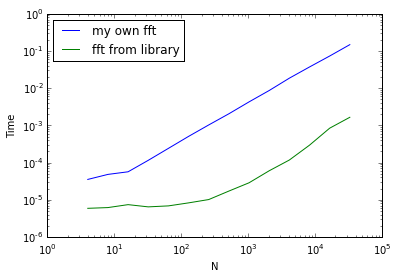

In [193]:
N = [2**i for i in range(2, 16)]
timings_ct = []
timings = []

for n in N:
    vector = np.random.random(n)

    clock = %timeit -o fft(vector)
    timings_ct.append(clock.best)
    clock = %timeit -o np.fft.fft(vector)
    timings.append(clock.best)
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time')
plt.xlabel('N')
plt.plot(N, timings_ct, label='my own fft')
plt.plot(N, timings, label='fft from library')
plt.legend(loc='upper left')
plt.show()

We know, that when the input vector size is N, the complexity of fft contains twice N devided by two and complexity of two  multiplication with diagonal matrix. Multiplication with diagonal matrix of size M*M is equal to O(M).
Thus :
$$T(N) = 2T\left(\dfrac{N}{2}\right) + n$$
$$T\left(\dfrac{N}{2}\right) = 2T\left(\dfrac{N}{4}\right) + \dfrac{N}{2}$$
$$T\left(\dfrac{N}{4}\right) = 2T\left(\dfrac{N}{8}\right) + \dfrac{N}{4}$$
Hence: 
$$T(n) = 2^k T\left(\dfrac{N}{2^k}\right) + kN$$
We know, that $2^k = N$,
And so $$T(N) = N + N log_2 N$$

It holds if we do not consider the number of additions during the multiplication with smaller matrices (of size $\dfrac{N}{2}, \dfrac{N}{4}, etc$).

# Problem 2 (Strassen algorithm)

## 25 pts

* Implement Strassen algorithm. For simplicity consider that n is a power of 2
* Compare your implementation the Strassen algorithm with direct matrix-matrix multiplication using loops and `𝚗p.𝚍𝚘𝚝` function by ploting timings as a function of $n$.

It might be a good idea not to do recursion in the Strassen algorithm to the bottom level. Sometimes only several levels of the recursion are used. This helps to reduce a constant outside $n^3$. 
* Find analytically constant outside $n^3$ after $2$ levels of the Strassen algorithm. Compare it with $2n^3$ in the naive version.

In [211]:
def strassen(A, B):
    M, N = A.shape
    
    if M <= 4 or N <= 4:
        return A.dot(B)

    A11 = A[0 : int(M / 2), 0 : int(N / 2)]
    A12 = A[0 : int(M / 2), int(N / 2) :]
    A21 = A[int(M / 2) :, 0 : int(N / 2)]
    A22 = A[int(M / 2) :, int(N / 2) :]
    
    B11 = B[0 : int(M / 2), 0 : int(N / 2)]
    B12 = B[0 : int(M / 2), int(N / 2) :]
    B21 = B[int(M / 2) :, 0 : int(N / 2)]
    B22 = B[int(M / 2) :, int(N / 2) :]
    
    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)
    
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

The slowest run took 97.61 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.74 µs per loop
The slowest run took 6.61 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.46 µs per loop
The slowest run took 8.35 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 77.1 µs per loop
The slowest run took 10.28 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.62 µs per loop
1000 loops, best of 3: 629 µs per loop
The slowest run took 46.05 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.31 µs per loop
100 loops, best of 3: 4.6 ms per loop
The slowest run took 12.96 times longer than the fastest. This could mean that an intermediate result is being cached 

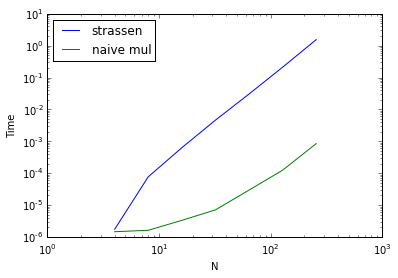

In [213]:
N = [2**i for i in range(2, 9)]
timings_ct = []
timings = []

for n in N:
    matrix = np.random.random((n, n))

    clock = %timeit -o strassen(matrix, matrix)
    timings_ct.append(clock.best)
    clock = %timeit -o matrix.dot(matrix)
    timings.append(clock.best)
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time')
plt.xlabel('N')
plt.plot(N, timings_ct, label='strassen')
plt.plot(N, timings, label='naive mul')
plt.legend(loc='upper left')
plt.show()

Application of 2 levels of Strassen algorithm gives us:
$$T\left(N\right) = 7T\left(\dfrac{N}{2}\right) + 18 S\left(\dfrac{N}{2}\right)$$
$$T\left(\dfrac{N}{2}\right) = 7T\left(\dfrac{N}{4}\right) + 18 S\left(\dfrac{N}{4}\right)$$
Thus $$T(N) = 49T\left(\dfrac{N}{4}\right) + 126 S\left(\dfrac{N}{4}\right) + 18 S\left(\dfrac{N}{2}\right)$$
$$T(N) = 49 \cdot \dfrac{2 N^3}{4^3} + 126 \cdot S\left(\dfrac{N}{4}\right) + 18 S\left(\dfrac{N}{2}\right)$$
$S(N)$ has $O(N^2)$ complexity, so we are not interested in it.

ANd thus $$T(N) = \dfrac{49}{32} N^3$$

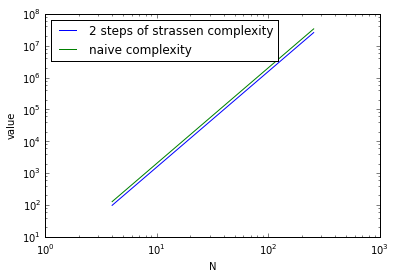

In [251]:
T1 = lambda x : 49 * x ** 3 / 32.0
T2 = lambda x : 2 * x ** 3 

N = [2**i for i in range(2, 9)]
t1_res = []
t2_res = []

for n in N:
    t1_res.append(T1(n))
    t2_res.append(T2(n))
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('value')
plt.xlabel('N')
plt.plot(N, t1_res, label='2 steps of strassen complexity')
plt.plot(N, t2_res, label='naive complexity')
plt.legend(loc='upper left')
plt.show()

In [223]:
def restricted_strassen(A, B, call_number = 0):
    M, N = A.shape
    
    # apply only 3 levels of recursion
    if call_number > 2:
        return A.dot(B)

    A11 = A[0 : int(M / 2), 0 : int(N / 2)]
    A12 = A[0 : int(M / 2), int(N / 2) :]
    A21 = A[int(M / 2) :, 0 : int(N / 2)]
    A22 = A[int(M / 2) :, int(N / 2) :]
    
    B11 = B[0 : int(M / 2), 0 : int(N / 2)]
    B12 = B[0 : int(M / 2), int(N / 2) :]
    B21 = B[int(M / 2) :, 0 : int(N / 2)]
    B22 = B[int(M / 2) :, int(N / 2) :]
    
    P1 = restricted_strassen(A11 + A22, B11 + B22, call_number + 1)
    P2 = restricted_strassen(A21 + A22, B11, call_number + 1)
    P3 = restricted_strassen(A11, B12 - B22, call_number + 1)
    P4 = restricted_strassen(A22, B21 - B11, call_number + 1)
    P5 = restricted_strassen(A11 + A12, B22, call_number + 1)
    P6 = restricted_strassen(A21 - A11, B11 + B12, call_number + 1)
    P7 = restricted_strassen(A12 - A22, B21 + B22, call_number + 1)
    
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

1000 loops, best of 3: 663 µs per loop
The slowest run took 12.09 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.4 µs per loop
1000 loops, best of 3: 596 µs per loop
The slowest run took 28.79 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.6 µs per loop
1000 loops, best of 3: 597 µs per loop
The slowest run took 11.20 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.16 µs per loop
1000 loops, best of 3: 624 µs per loop
The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.07 µs per loop
1000 loops, best of 3: 923 µs per loop
10000 loops, best of 3: 27.1 µs per loop
1000 loops, best of 3: 1.52 ms per loop
10000 loops, best of 3: 119 µs per loop
100 loops, best of 3: 4.09 ms per loop
10

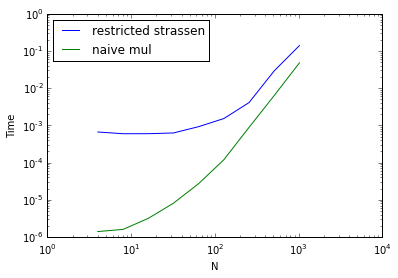

In [224]:
N = [2**i for i in range(2, 11)]
timings_ct = []
timings = []

for n in N:
    matrix = np.random.random((n, n))

    clock = %timeit -o restricted_strassen(matrix, matrix, 1)
    timings_ct.append(clock.best)
    clock = %timeit -o matrix.dot(matrix)
    timings.append(clock.best)
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time')
plt.xlabel('N')
plt.plot(N, timings_ct, label='restricted strassen')
plt.plot(N, timings, label='naive mul')
plt.legend(loc='upper left')
plt.show()

# Problem 3 (Fast convolution)

## 30 pts

#### 1D

* Implement fast multiplication of a Toeplitz matrix by a given vector with $\mathcal{O}(n \log n)$ complexity. Make sure that you do not form the Toeplitz matrix itself!

* Now you are able to implement Problem 1 from the Problem Set 1 without truncating the signal. Convolve your signal with the filter $T$ using your fast multiplication algorithm (set $\alpha=\frac{1}{20}$). Play the signal.

#### 2D

* Find convolution of the Lena $n\times n$ image and the following filter
$$
T_{i_1j_1i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{50}
$$
with $\mathcal{O}(n^2 \log n^2)$ complexity. Plot the resulting image (`plt.imshow` might be helpful for this task). What is the complexity of naive summation?

In [2]:
def toeplitz_mul(t_row, v):
    n = t_row.shape[0]
    diff = n - v.shape[0]
    V = np.hstack((v, np.zeros(diff)))
    
    return np.real(np.fft.ifft(np.fft.fft(t_row) * np.fft.fft(V)))

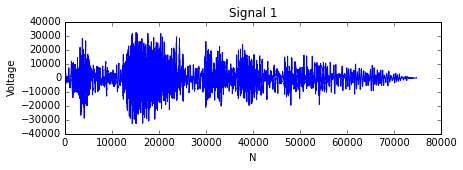

In [3]:
#Tech stuff
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np
import sys
%matplotlib inline

def load_wav(filename,samplerate=44100):
    
    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, len(data) * ratio)
    
    return samplerate, data.astype(np.int16)

#Reading the wavefile
import StringIO
import base64
import struct  

from IPython.core.display import HTML
from IPython.core.display import display

def wavPlayer(data, rate):
    """ will display html 5 player for compatible browser
    The browser need to know how to play wav through html5.
    there is no autoplay to prevent file playing when the browser opens
    Adapted from SciPy.io. and
    github.com/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb
    """
    
    buffer = StringIO.StringIO()
    buffer.write(b'RIFF')
    buffer.write(b'\x00\x00\x00\x00')
    buffer.write(b'WAVE')

    buffer.write(b'fmt ')
    if data.ndim == 1:
        noc = 1
    else:
        noc = data.shape[1]
    bits = data.dtype.itemsize * 8
    sbytes = rate*(bits // 8)*noc
    ba = noc * (bits // 8)
    buffer.write(struct.pack('<ihHIIHH', 16, 1, noc, rate, sbytes, ba, bits))

    # data chunk
    buffer.write(b'data')
    buffer.write(struct.pack('<i', data.nbytes))

    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and sys.byteorder == 'big'):
        data = data.byteswap()

    buffer.write(data.tostring())
    # return buffer.getvalue()
    # Determine file size and place it in correct
    # position at start of the file.
    size = buffer.tell()
    buffer.seek(4)
    buffer.write(struct.pack('<i', size-8))
    
    val = buffer.getvalue()
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/wav;base64,{base64}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64=base64.encodestring(val))
    display(HTML(src))
    
#The first sound
import pylab as pl
import numpy as np
# load
fs1,s1 = load_wav('../nla2015/lectures/tbawht02.wav') # Terran Battlecruiser - "Good day, commander."

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s1)
pl.title('Signal 1')
pl.ylabel('Voltage')
pl.xlabel('N')
pl.show()

# player
wavPlayer(s1, fs1)

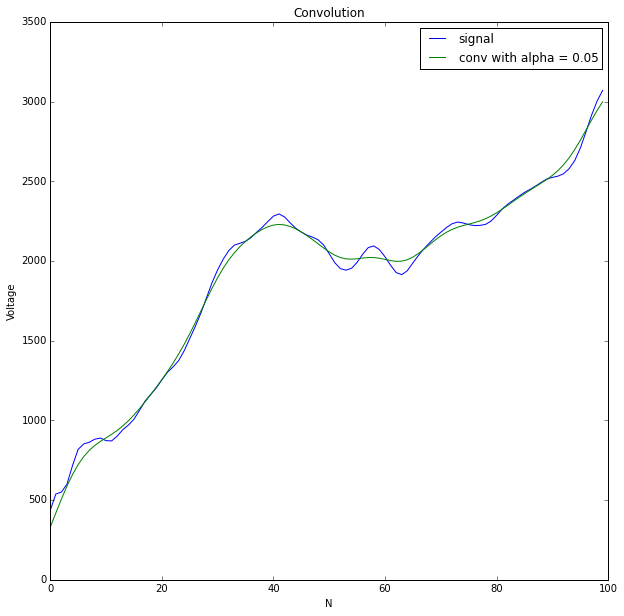

In [4]:
alpha = 1 / 20.0
t_vec = np.sqrt(alpha / np.pi) * np.exp(-alpha * np.arange(len(s1)) ** 2)
t_vec = np.hstack((t_vec, t_vec[1:len(t_vec)][::-1]))

pl.figure(figsize=(10,10))
pl.plot(s1[0:100], label='signal')
pl.title('Convolution')

convolution = toeplitz_mul(t_vec, s1)

pl.plot(convolution[0:100], label='conv with alpha = {0}'.format(alpha))
    
pl.legend(loc='upper right')
pl.ylabel('Voltage')
pl.xlabel('N')
pl.show()

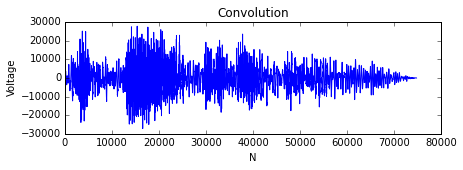

In [5]:
# plot
pl.figure(figsize=(6.75,2))
pl.plot(convolution[0:len(s1)])
pl.title('Convolution')
pl.ylabel('Voltage')
pl.xlabel('N')
pl.show()

wavPlayer(convolution[0:len(s1)].astype(np.int16), fs1)

In [30]:
from scipy import signal
from scipy import misc

def extend(i, shape):
    result = np.zeros(shape)
    result[0:i.shape[0], 0:i.shape[1]] = i
    
    return result


def toeplitz2d_mul(f, i):
    I = extend(i, f.shape)
    
    return np.real(np.fft.ifft2(np.fft.fft2(f) * np.fft.fft2(I)))


lena = misc.lena()
alpha = 1 / 50.0

n = lena.shape[0]

i, j = np.meshgrid(np.arange(n), np.arange(n))

T = np.zeros((2 * n  - 1, 2 * n - 1))
t = np.sqrt(alpha / np.pi) * np.exp(-alpha * (i ** 2 + j ** 2))
T[0:n, 0:n] = t
T[0:n, n:] = np.fliplr(t[:, 1:])
T[n:, 0:n] = np.flipud(t[1:, :])
T[n:, n:] = np.fliplr(np.flipud(t[1:, 1:]))

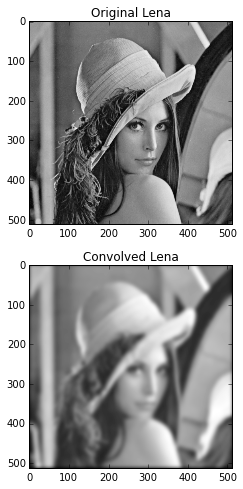

In [50]:
conv = toeplitz2d_mul(T, lena)
fig, ax = plt.subplots(2, figsize=(8, 8))
ax[0].imshow(lena, cmap='gray')
ax[0].set_title('Original Lena')
ax[1].imshow(conv[0:n, 0:n], cmap='gray')
ax[1].set_title('Convolved Lena')

The complexity of naive summation is O($n^4$)

# Problem 4 (SVD intro)

## 20 pts

* Find SVD decomposition of the Lena image and plot its singular values.
* Compress the image using trunction of singular values. Plot compressed images for several $r$ ($r$ is a number of remaining singular values). Specify in titles of images compression rate. **Note:** do not forget to use `plt.subplots`.

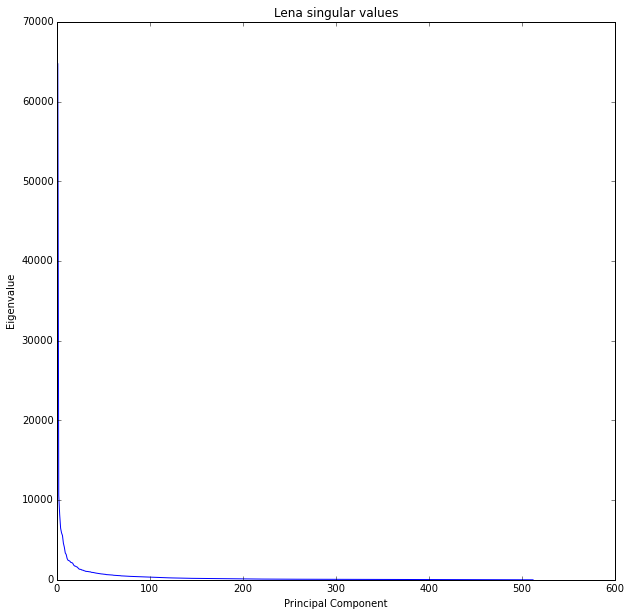

In [85]:
u, s, v = np.linalg.svd(lena)

fig = plt.figure(figsize=(10,10))
sing_vals = np.arange(n) + 1
plt.plot(sing_vals, s)
plt.title('Lena singular values')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [113]:
R = np.arange(10, 400)
compressed_lenas = []

for r in R:
    compressed_lena = u[:, 0:r].dot(np.diag(s[0:r])).dot(v[0:r, :])
    compressed_lenas.append(compressed_lena)

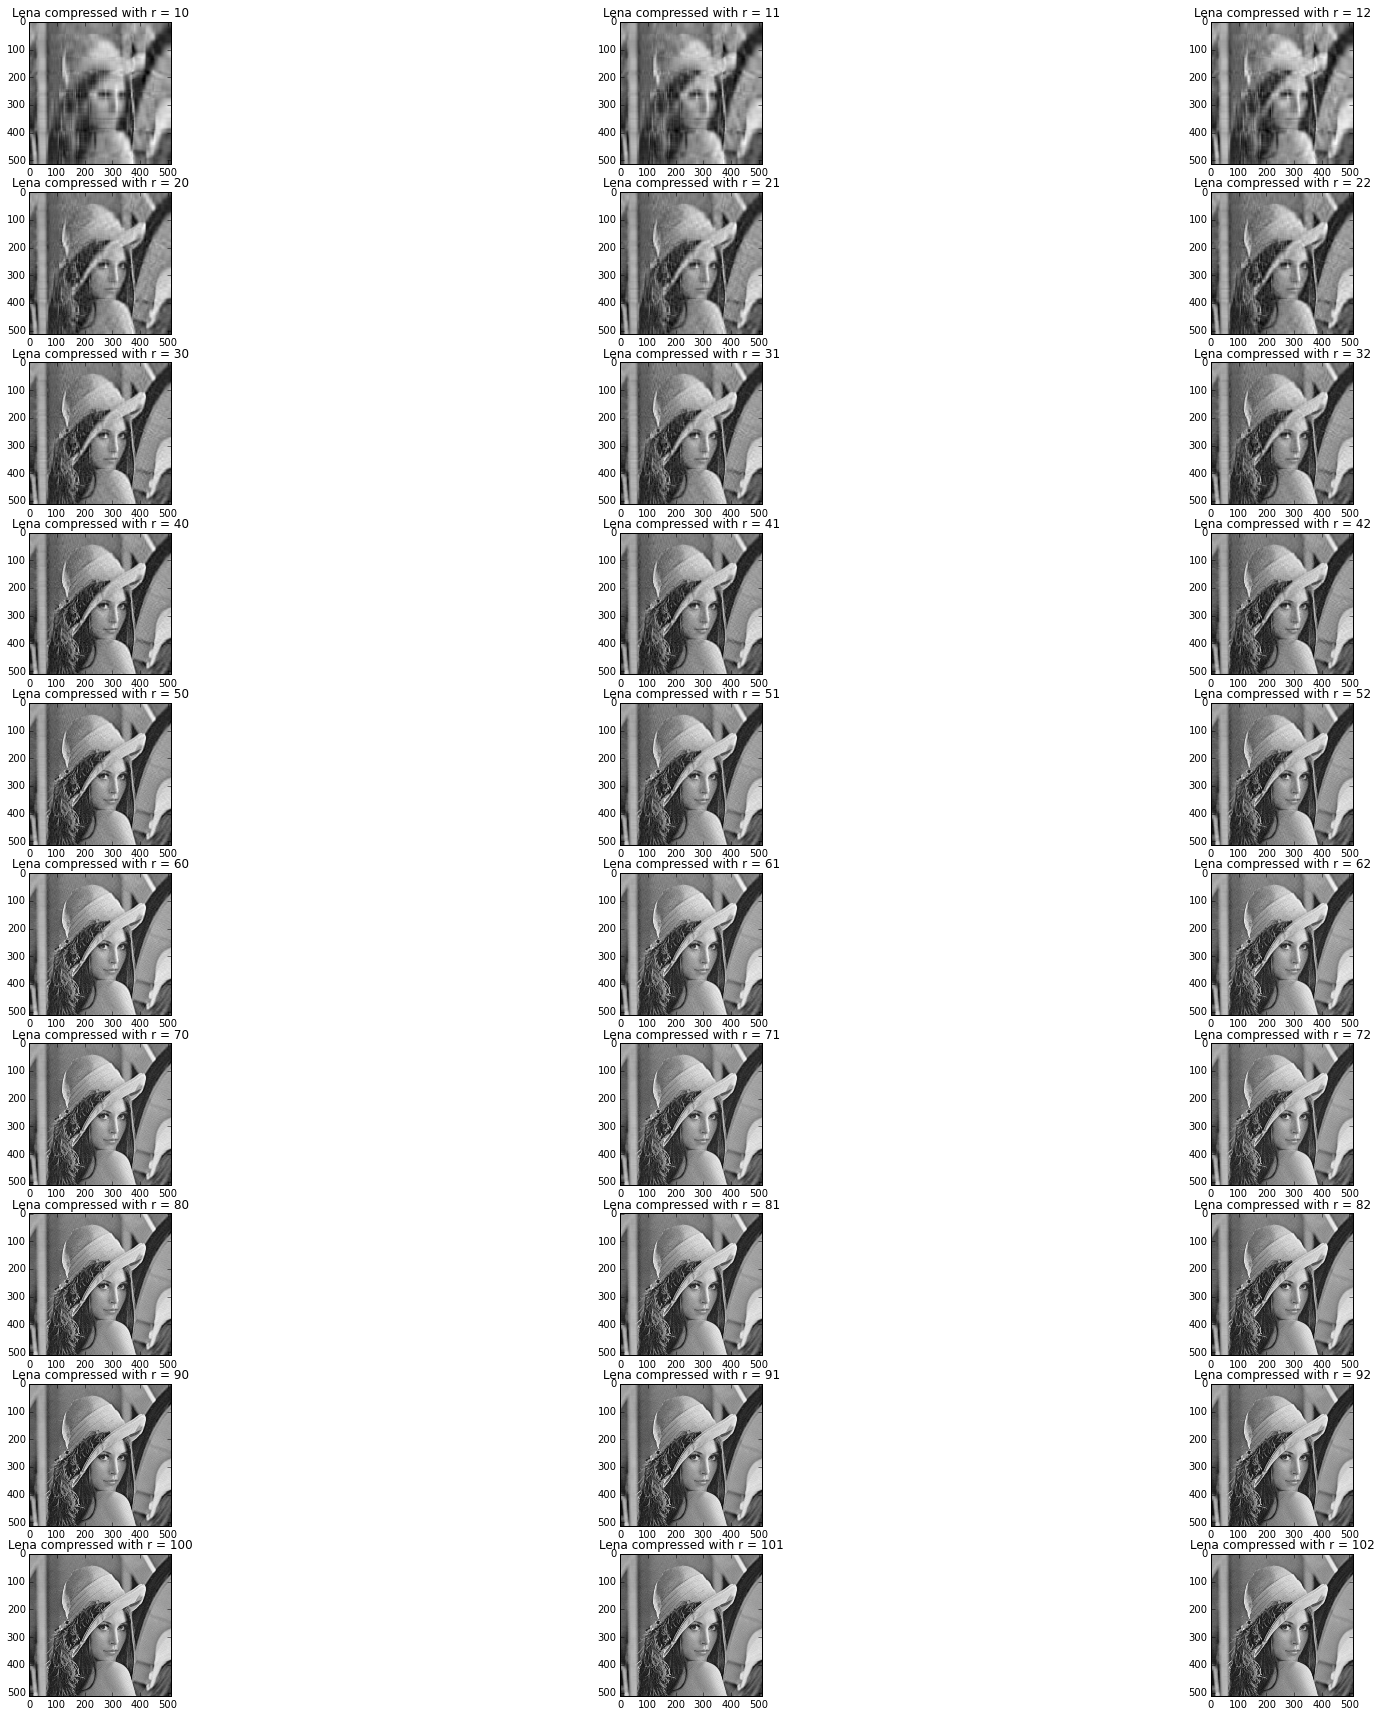

In [114]:
fig, ax = plt.subplots(10, 3, figsize=(30, 30))
ax[0][0].imshow(lena, cmap='gray')
ax[0][0].set_title('Original Lena')

for i in range(0, 10):
    for j in range(0, 3):
        ax[i][j].imshow(compressed_lenas[i * 10 + j], cmap='gray')
        ax[i][j].set_title('Lena compressed with r = {0}'.format(i * 10 + j + 10))

# Bonus Problem (HOSVD)

Implement High-Order SVD (HOSVD) algorithm in 3D. As an output give ranks of the 3D Hilbert tensor
$$
a_{ijk} = \frac{1}{i+j+k + 1}, \quad i,j,k = 0,\dots, 199
$$
with $10^{-5}$ accuracy. Details can be found [here](http://ca.sandia.gov/~tgkolda/pubs/pubfiles/TensorReview.pdf) on Figure 4.3.